In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
"""img = cv2.imread('IMG_9125.tif',0)
#rows, cols = img.shape
plt.imshow(img, cmap = 'gray')
print(img.shape)"""


"img = cv2.imread('IMG_9125.tif',0)\n#rows, cols = img.shape\nplt.imshow(img, cmap = 'gray')\nprint(img.shape)"

In [2]:
def retFrames(name, number):
    imgArr = []
    for i in range(1,number+1):
        imgArr.append(cv2.imread(name +" (" + str(i) + ").tif",-1))
        
    #print(np.shape(imgArr))
    #print(imgArr[0])
    
    return imgArr

def averageFrames(imgArr):
    avgFrame = np.sum(imgArr, axis = 0)/(len(imgArr))
    #print(avgFrame)
    #print(np.shape(avgFrame))
    return avgFrame

def averagePixel(img):
    total = 0
    for i in range(0,len(img)):
        total = total + np.sum(img[i])/len(img[0])
    avg = total/len(img)
    return avg

def saveMaster(name, number, filename):
    cv2.imwrite(filename, averageFrames(retFrames(name,number)))
    
def calcGain(flat1, flat2, bias1, bias2, bitDepth, verbose = 0):
    #pixel averaging
    if verbose == 1:
        fig1 = plt.figure(1)
        hist = cv2.calcHist([flat1],[0],None,[2**(bitDepth)],[0,2**(bitDepth)])
        plt.plot(hist)
        fig1.show()
        fig2 = plt.figure(2)
        hist = cv2.calcHist([bias1],[0],None,[2**(bitDepth)],[0,2**(bitDepth)])
        plt.plot(hist)
        fig2.show()
    
    avgFlatPixel = averagePixel(flat1) + averagePixel(flat2)
    print("avg flat pixel" + str(avgFlatPixel))
    avgBiasPixel = averagePixel(bias1) + averagePixel(bias2)
    #calculating difference images
    flatDiff = (flat1 - flat2 + 2**(bitDepth - 1)).flatten()
    biasDiff = (bias1 - bias2 + 2**(bitDepth - 1)).flatten()
    #plotting difference distribution
    counts, bins = np.histogram(flatDiff,20)
    print(np.sum(counts))
    #plt.plot(bins[:20], counts, label = "diff histo")
    #Same thing as aove but with an opencv method instead of numpy
    fig3 = plt.figure(3)
    hist = cv2.calcHist([flat1 - flat2 + 2**(bitDepth - 1)],[0],None,[2**(bitDepth)],[0,2**(bitDepth)])
    plt.plot(hist)
    fig3.show()
    print(np.sum(hist.T))

    #calculating standard deviation of difference image                                               
    stdFlat = np.std(flatDiff)
    print(stdFlat)
    stdBias = np.std(biasDiff)
    #calculating e/ADU
    corrMean = avgFlatPixel - avgBiasPixel
    corrVar = stdFlat*stdFlat - stdBias*stdBias
    eADU = corrMean/corrVar
    
    return eADU, corrMean, corrVar

def calcGain1Frame(flat1):
    avgPixel = averagePixel(flat1)
    flatFlat = flat1.flatten()
    plt.hist(flatFlat,100)
    stdFlat = np.std(flatFlat)
    Gain = avgPixel/(stdFlat*stdFlat)
    return Gain, avgPixel, stdFlat*stdFlat

True

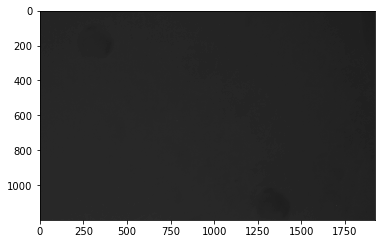

In [3]:
plt.imshow(averageFrames(retFrames("Test/flats 1 G100/flats 1 G100",29)),cmap = 'gray')
cv2.imwrite("Mflat 1 G100.png", averageFrames(retFrames("Test/flats 1 G100/flats 1 G100",29)))

In [4]:
img = retFrames("Test/flats 0.25/flats 0.25",31)
#print(np.shape(img))
#print(img)

In [5]:
img = np.asarray(img).transpose(1,2,0)
#print(np.shape(img))
#print (img)

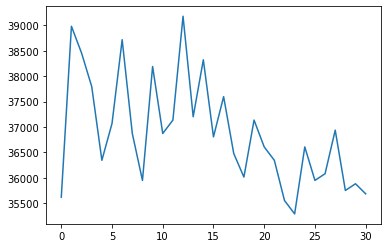

In [6]:
plt.plot(img[0][0])

In [7]:
#reading as a 16 bit file gain set at 25
img2 = cv2.imread("Test/flats 1 G25 new/flats 1 G25 new (15).tif",-1)
img1 = cv2.imread("Test/flats 1 G25 new/flats 1 G25 new (16).tif",-1)
bias1 = cv2.imread("Test/bias 0.01ms G25/bias 0.01ms G25 (10).tif",-1)
bias2 = cv2.imread("Test/bias 0.01ms G25/bias 0.01ms G25 (9).tif",-1)
print(averagePixel(img2))
print(averagePixel(img1))

32589.17319921882
34077.84835590275


avg flat pixel66667.02155512158
2304000
2304000.0
963.9863642081064


d:\code\py install\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.07174130482303127, 66667.02155512158, 929269.7103791639)

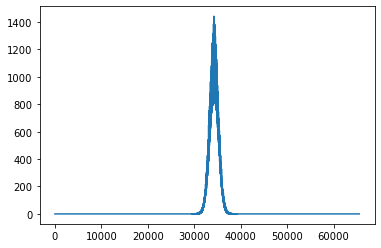

In [8]:
calcGain(img1,img2,bias1,bias2,16)

In [9]:
print(np.max(img2))

65535


avg flat pixel259.4221306423611
2304000
2304000.0
3.787614628555105


d:\code\py install\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(18.083206904892958, 259.4221306423611, 14.346024574444625)

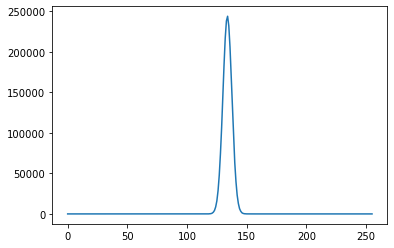

In [10]:
#reading as a 8 bit file gain set at 25
img2 = cv2.imread("Test/flats 1 G25 new/flats 1 G25 new (15).tif",0)
img1 = cv2.imread("Test/flats 1 G25 new/flats 1 G25 new (16).tif",0)
bias1 = cv2.imread("Test/bias 0.01ms G25/bias 0.01ms G25 (10).tif",0)
bias2 = cv2.imread("Test/bias 0.01ms G25/bias 0.01ms G25 (9).tif",0)
calcGain(img1,img2,bias1,bias2,8)

avg flat pixel56366.894870225704
2304000
2304000.0
1057.1879515526878


d:\code\py install\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.05043356882823764, 56366.894870225704, 1117646.364908168)

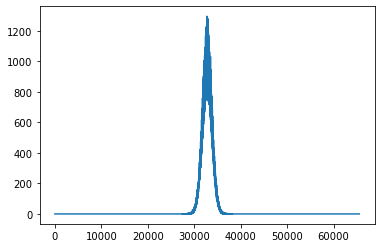

In [11]:
#reading as a 16 bit file gain set at 50
img2 = cv2.imread("Test/flats 1 new/flats 1 new (10).tif",-1)
img1 = cv2.imread("Test/flats 1 new/flats 1 new (9).tif",-1)
bias1 = cv2.imread("Test/bias 0.01ms/bias 0.01ms (10).tif",-1)
bias2 = cv2.imread("Test/bias 0.01ms/bias 0.01ms (9).tif",-1)
calcGain(img1,img2,bias1,bias2,16)

In [12]:
print(bias1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


avg flat pixel219.18831727430558
2304000
2304000.0
4.155693665837667


d:\code\py install\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(12.692008371304059, 219.18831727430558, 17.26978984428331)

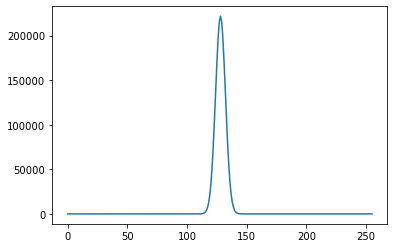

In [13]:
#reading as a 8 bit file gain set at 50
img2 = cv2.imread("Test/flats 1 new/flats 1 new (10).tif",0)
img1 = cv2.imread("Test/flats 1 new/flats 1 new (9).tif",0)
bias1 = cv2.imread("Test/bias 0.01ms/bias 0.01ms (10).tif",0)
bias2 = cv2.imread("Test/bias 0.01ms/bias 0.01ms (9).tif",0)
calcGain(img1,img2,bias1,bias2,8)

avg flat pixel64622.437248263894
2304000
2304000.0
1612.9640711085167


d:\code\py install\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.024838990786371345, 64622.437248263894, 2601653.09468696)

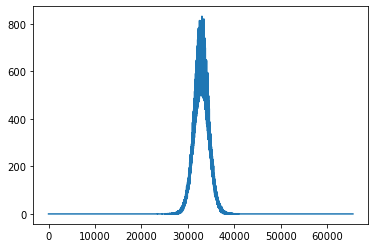

In [14]:
#reading as a 16 bit file gain set at 100
img2 = cv2.imread("Test/flats 1 G100/flats 1 G100 (10).tif",-1)
img1 = cv2.imread("Test/flats 1 G100/flats 1 G100 (9).tif",-1)
bias1 = cv2.imread("Test/bias 0.01 G100/bias 0.01 G100 (10).tif",-1)
bias2 = cv2.imread("Test/bias 0.01 G100/bias 0.01 G100 (9).tif",-1)
calcGain(img1,img2,bias1,bias2,16)

In [15]:
print(bias1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


avg flat pixel251.441657986111
2304000
2304000.0
6.31027244690104


d:\code\py install\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(6.314529710264835, 251.441657986111, 39.81953835411844)

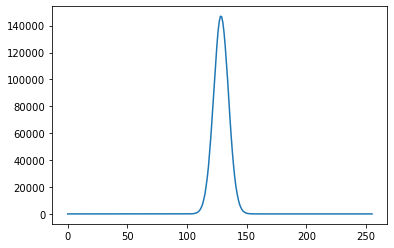

In [16]:
#reading as a 8 bit file gain set at 100
img2 = cv2.imread("Test/flats 1 G100/flats 1 G100 (10).tif",0)
img1 = cv2.imread("Test/flats 1 G100/flats 1 G100 (9).tif",0)
bias1 = cv2.imread("Test/bias 0.01 G100/bias 0.01 G100 (10).tif",0)
bias2 = cv2.imread("Test/bias 0.01 G100/bias 0.01 G100 (9).tif",0)
calcGain(img1,img2,bias1,bias2,8)

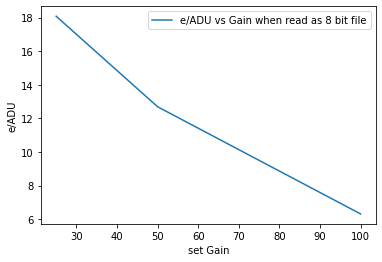

In [17]:
plt.plot([25, 50, 100],[18.08, 12.69, 6.31], label = "e/ADU vs Gain when read as 8 bit file")
plt.ylabel("e/ADU")
plt.xlabel("set Gain")
plt.legend()

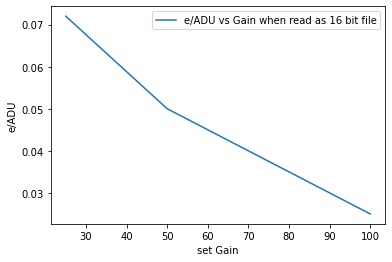

In [18]:
plt.plot([25, 50, 100],[0.072, 0.05,0.025], label = "e/ADU vs Gain when read as 16 bit file")
plt.ylabel("e/ADU")
plt.xlabel("set Gain")
plt.legend()

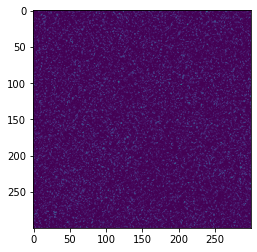

In [19]:
import rawpy as rp

img2 = cv2.imread("Test/canon CMOS/IMG_9648.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9649.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9659.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9660.tif",-1)
startr = 0
stopr = 300
startc = 0
stopc = 300
plt.imshow(bias2[startr:stopr,startc:stopc,1]/2**16)


avg flat pixel26063.00867777777
90000
90000.0
1342.3830098440476


d:\code\py install\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.01455034288113745, 25955.900755555547, 1783868.6667105185)

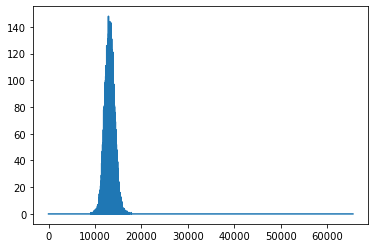

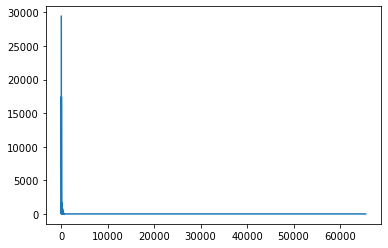

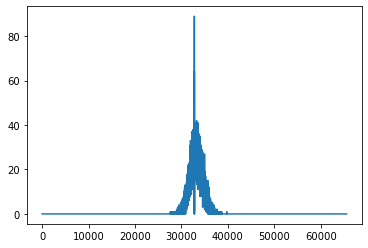

In [20]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

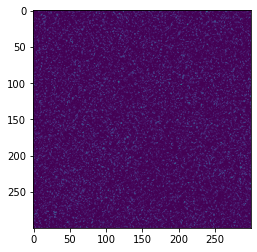

In [21]:
import rawpy as rp

img2 = cv2.imread("Test/canon CMOS/IMG_9650.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9651.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9659.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9660.tif",-1)
startr = 0
stopr = 300
startc = 0
stopc = 300
plt.imshow(bias2[startr:stopr,startc:stopc,1]/2**16)


avg flat pixel45210.94248888889
90000
90000.0
1417.451488089138


d:\code\py install\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.022653344886320075, 45103.834566666665, 1991045.2426786656)

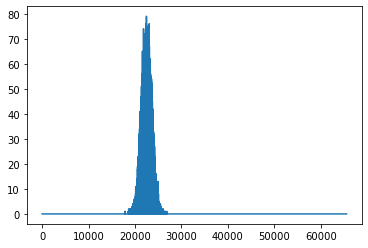

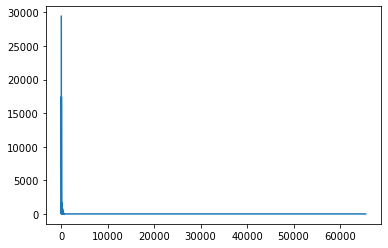

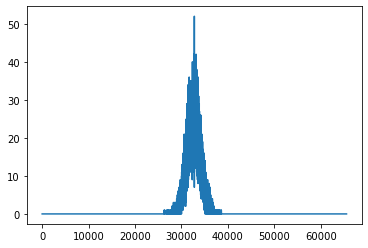

In [22]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

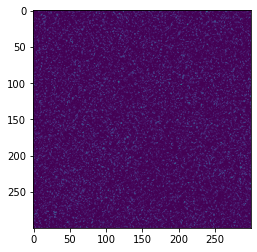

In [23]:
import rawpy as rp

img2 = cv2.imread("Test/canon CMOS/IMG_9653.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9654.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9659.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9660.tif",-1)
startr = 0
stopr = 300
startc = 0
stopc = 300
plt.imshow(bias2[startr:stopr,startc:stopc,1]/2**16)


avg flat pixel71158.7288222222
90000
90000.0
1291.9279451929037


d:\code\py install\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.04303669659458834, 71051.62089999998, 1650954.3371629126)

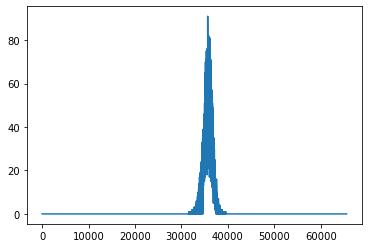

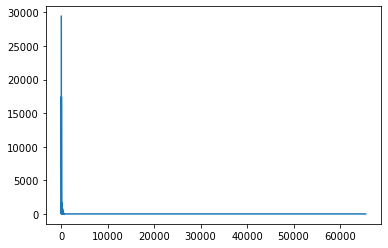

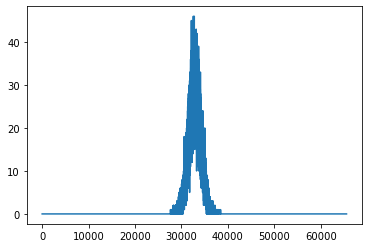

In [24]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

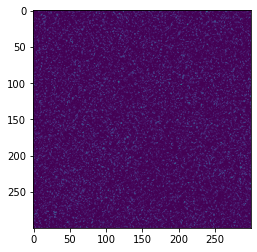

In [25]:
import rawpy as rp

img2 = cv2.imread("Test/canon CMOS/IMG_9655.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9656.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9659.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9660.tif",-1)
startr = 0
stopr = 300
startc = 0
stopc = 300
plt.imshow(bias2[startr:stopr,startc:stopc,1]/2**16)


avg flat pixel98265.32136666669
90000
90000.0
807.8166145073267


d:\code\py install\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.15471528116157598, 98158.21344444447, 634444.204266633)

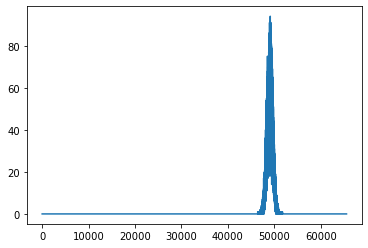

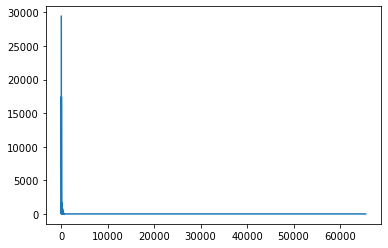

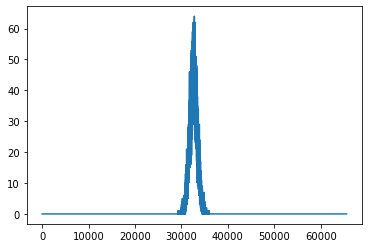

In [26]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

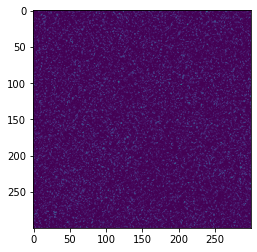

In [29]:


img2 = cv2.imread("Test/canon CMOS/IMG_9657.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9658.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9659.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9660.tif",-1)
startr = 0
stopr = 300
startc = 0
stopc = 300
plt.imshow(bias2[startr:stopr,startc:stopc,1]/2**16)


avg flat pixel123895.53869999989
90000
90000.0
187.17660565589148


d:\code\py install\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(7.319733593602978, 123788.43077777767, 16911.603297415302)

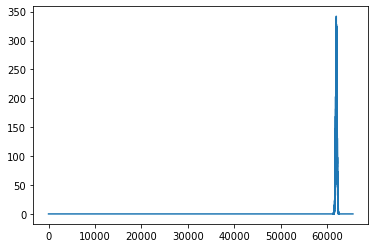

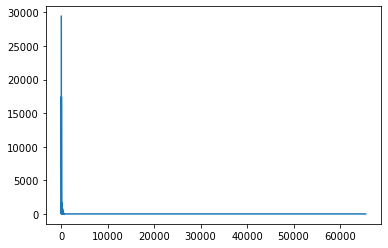

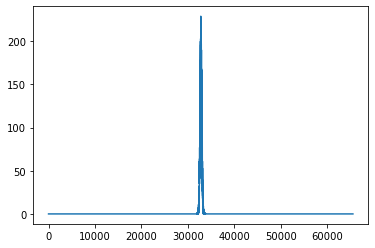

In [30]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

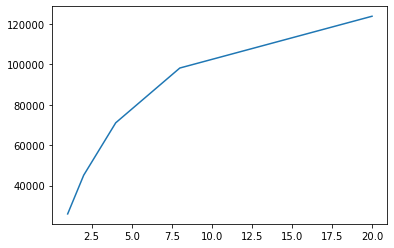

In [32]:
plt.plot([1,2,4,8,20],[25955,45103,71051,98158,123788], label = "linearity")

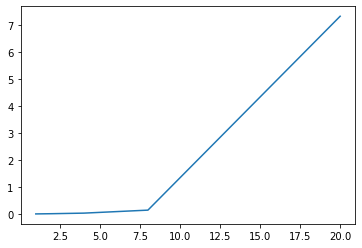

In [31]:
plt.plot([1,2,4,8,20],[0.014,0.022,0.043,0.154,7.32], label = "Gain vs exposure")

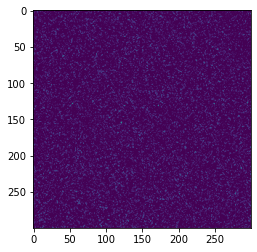

In [36]:


img2 = cv2.imread("Test/canon CMOS/IMG_9664.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9665.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9730.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9731.tif",-1)
startr = 0
stopr = 300
startc = 0
stopc = 300
plt.imshow(bias2[startr:stopr,startc:stopc,1]/2**16)


avg flat pixel34036.96814444442
90000
90000.0
2067.8443718535596


d:\code\py install\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.008076417559795232, 33824.63236666664, 4188073.748817443)

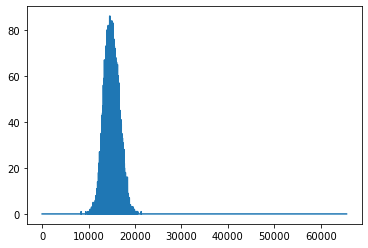

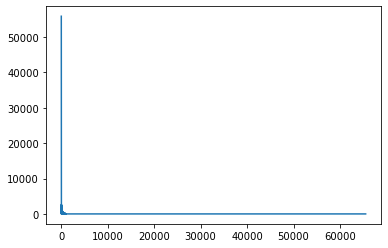

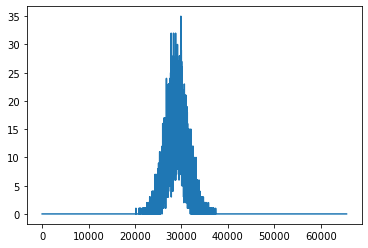

In [37]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)

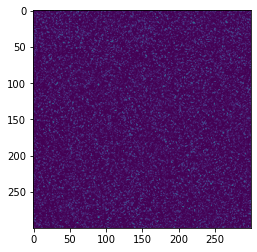

In [38]:


img2 = cv2.imread("Test/canon CMOS/IMG_9678.tif",-1)
img1 = cv2.imread("Test/canon CMOS/IMG_9679.tif",-1)
bias1 = cv2.imread("Test/canon CMOS/IMG_9676.tif",-1)
bias2 = cv2.imread("Test/canon CMOS/IMG_9677.tif",-1)
startr = 0
stopr = 300
startc = 0
stopc = 300
plt.imshow(bias2[startr:stopr,startc:stopc,1]/2**16)


avg flat pixel10762.557511111107
90000
90000.0
630.8203836318917


d:\code\py install\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
d:\code\py install\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


(0.027165648197925777, 10702.683155555551, 393978.56725438824)

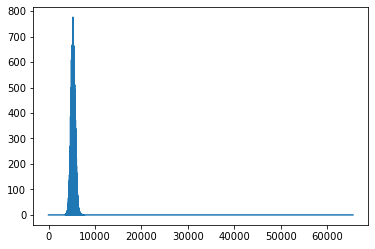

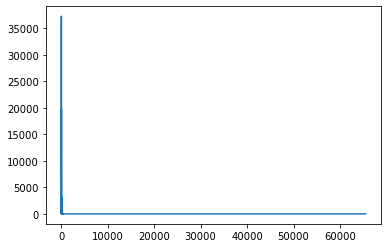

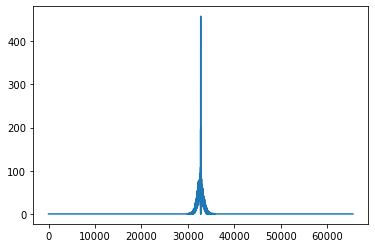

In [39]:

img2 = img2[startr:stopr,startc:stopc,1]
img1 = img1[startr:stopr,startc:stopc,1]
bias1 = bias1[startr:stopr,startc:stopc,1]
bias2 = bias2[startr:stopr,startc:stopc,1]
#print(img2)
calcGain(img1,img2,bias1,bias2,16,1)
#plt.xlim(32730,32800)
#print(np.shape(img2))
#flatimg2 = img2.flatten()
#plt.hist(flatimg2,1000)